In [1]:
#import important libraries

import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import datetime 

%matplotlib inline
plt.rcParams["figure.figsize"]=[12,5]

# Data Imported 
Here I imported cab Data file and next step would be Data cleansing. So I will take out the information of this dataset
Also I will reflect the dataset with head method for referencing

In [2]:
cab_data=pd.read_csv("cab_data.csv")
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [35]:
cab_data.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,01-09-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,01-07-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,01-03-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,01-08-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,01-04-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


# Changing the datatypes
In some of the columns the datatypes do not reflect the actual one, so here I will change the datatypes of columns as part of the cleansing process for futhur actions.

In [4]:
start_date = datetime.date(1899, 12, 31)
cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(lambda x: (start_date + datetime.timedelta(days=x)).strftime("%m-%d-%Y"))
cab_data = cab_data.astype({'Date of Travel':'datetime64', 'Company':'string','City':'string'})
cab_data.dtypes

TypeError: Casting to unit-less dtype 'datetime64' is not supported. Pass e.g. 'datetime64[ns]' instead.

# Importing Other files and checking the null values
I will import the other files to understand the relations between them

In [5]:
city = pd.read_csv("City.csv")
city.head(5)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [6]:
customer_id = pd.read_csv("Customer_ID.csv")
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [7]:
transaction_id = pd.read_csv("Transaction_ID.csv")
transaction_id.head(5)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [8]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [9]:
print(f'Shape of Cab data {cab_data.shape}')

Shape of Cab data (359392, 7)


In [10]:
cab_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [11]:
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [12]:
city.info()                                                                                                                                                                      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [13]:
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [14]:
city= city.astype({"City":"string","Population":"string","Users":"string"})

city['Population']= city['Population'].apply(lambda x:x.replace(',',""))
city['Users']= city['Users'].apply(lambda x: x.replace(',',""))

city = city.astype({"Population":"int","Users":"int"})

In [15]:
city.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In [16]:
customer_id.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [17]:
customer_id = customer_id.astype({"Gender":"string"})
customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  string
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), string(1)
memory usage: 1.5 MB


In [18]:
transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [19]:
transaction_id = transaction_id.astype({'Payment_Mode':'string'})

In [20]:
transaction_id.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [21]:
cab_data["Company"].value_counts()

Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64

# Conclusion-1
From the above output, we can see that yellow cab has marginally higer customer base than pink cab. Although, it cannot say the current scenario because pink cab is the newcommer in the market and has been operating for last couple of years which is less than yellow cab.

In [22]:
print(f'Price charge by Yellow cab: \n{cab_data[cab_data["Company"] == "Yellow Cab"]["Price Charged"].describe()}')
print('\n')
print(f'Price charge by Pink cab: \n{cab_data[cab_data["Company"] == "Pink Cab"]["Price Charged"].describe()}')

Price charge by Yellow cab: 
count    274681.000000
mean        458.181990
std         288.386166
min          20.730000
25%         226.680000
50%         425.060000
75%         633.880000
max        2048.030000
Name: Price Charged, dtype: float64


Price charge by Pink cab: 
count    84711.000000
mean       310.800856
std        181.995661
min         15.600000
25%        159.970000
50%        298.060000
75%        441.505000
max       1623.480000
Name: Price Charged, dtype: float64


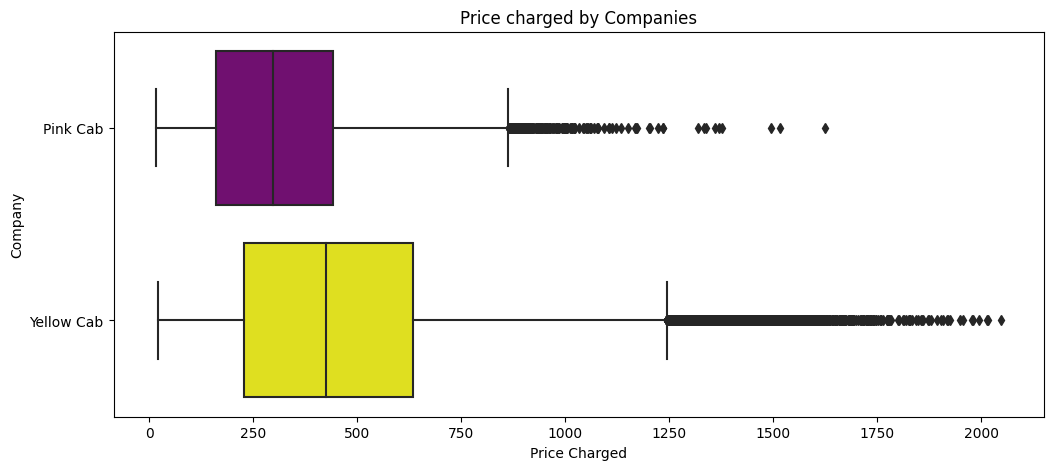

In [52]:
sns.boxplot(data=cab_data,x="Price Charged",y="Company",palette=["purple","yellow"]).set_title('Price charged by Companies');

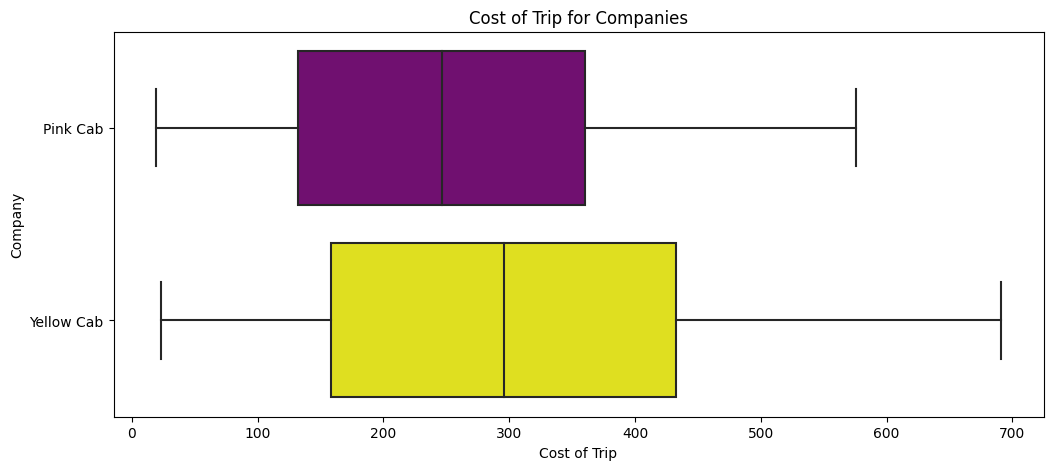

In [53]:
sns.boxplot(data=cab_data,x="Cost of Trip",y='Company',palette=["purple","yellow"]).set_title('Cost of Trip for Companies');

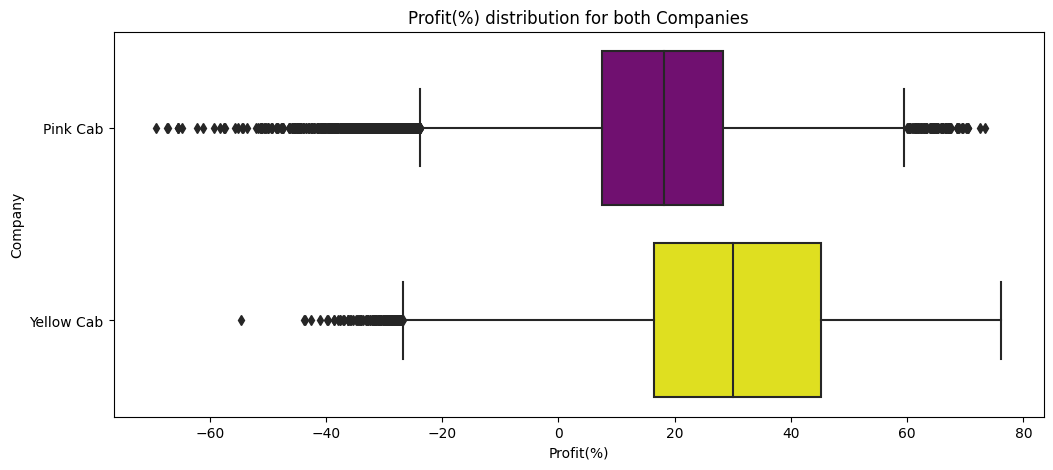

In [54]:
cab_data['Profit']= cab_data['Price Charged']- cab_data['Cost of Trip']
cab_data["Profit(%)"] = cab_data['Profit']*100/cab_data['Price Charged']
sns.boxplot(data=cab_data, y="Company",x="Profit(%)",palette=["purple","yellow"]).set_title('Profit(%) distribution for both Companies');

# Conclusion-2
From above two graphs, we can interprete that Yellow cab has higher profit margin than pink cab.

# Merging the datasets

In [27]:
masterdata = cab_data.merge(city,on="City").merge(transaction_id,on="Transaction ID").merge(customer_id, on="Customer ID")

In [28]:

masterdata=masterdata.astype({"Date of Travel":"datetime64[ns]","Company":"string","City":'string'})
masterdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  string        
 3   City                359392 non-null  string        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Profit              359392 non-null  float64       
 8   Population          359392 non-null  int64         
 9   Users               359392 non-null  int64         
 10  Customer ID         359392 non-null  int64         
 11  Payment_Mode        359392 non-null  string        
 12  Gender              359392 non-null  string        
 13  Age                 359392 no

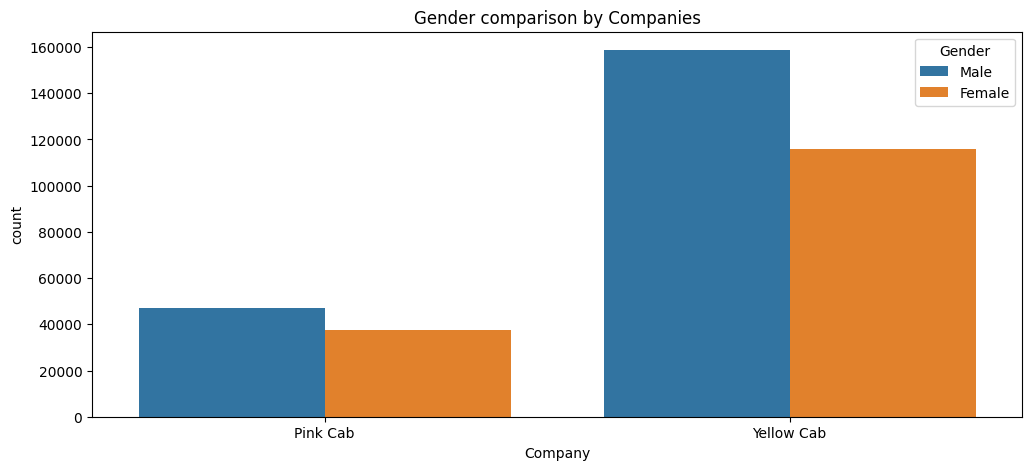

In [29]:
sns.countplot(data=masterdata,x="Company",hue="Gender").set_title("Gender comparison by Companies");

# Conclusion -3
Number of male users are more in the both cab brands over the years.

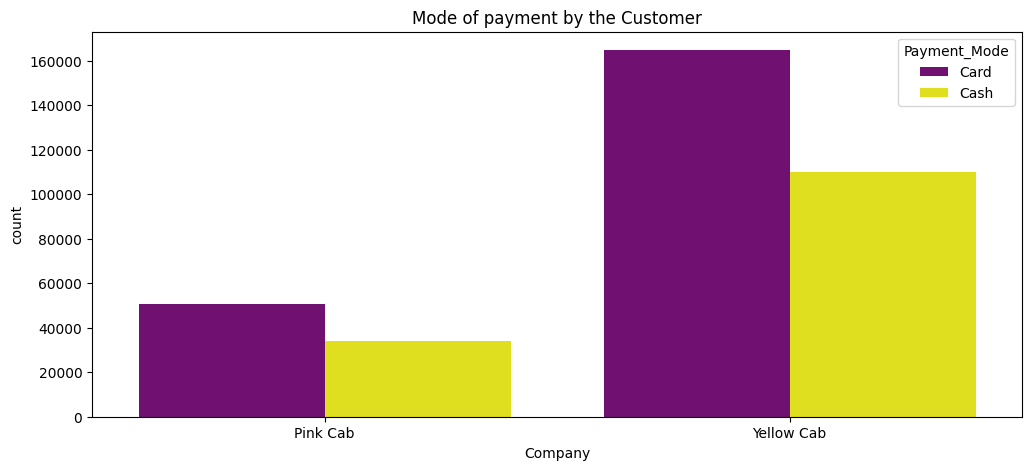

In [51]:
sns.countplot(data=masterdata,x="Company",hue='Payment_Mode',palette=["purple","yellow"]).set_title("Mode of payment by the Customer");

# Conclusion - 4
Customer prefers the Card option more for the mode of payment.

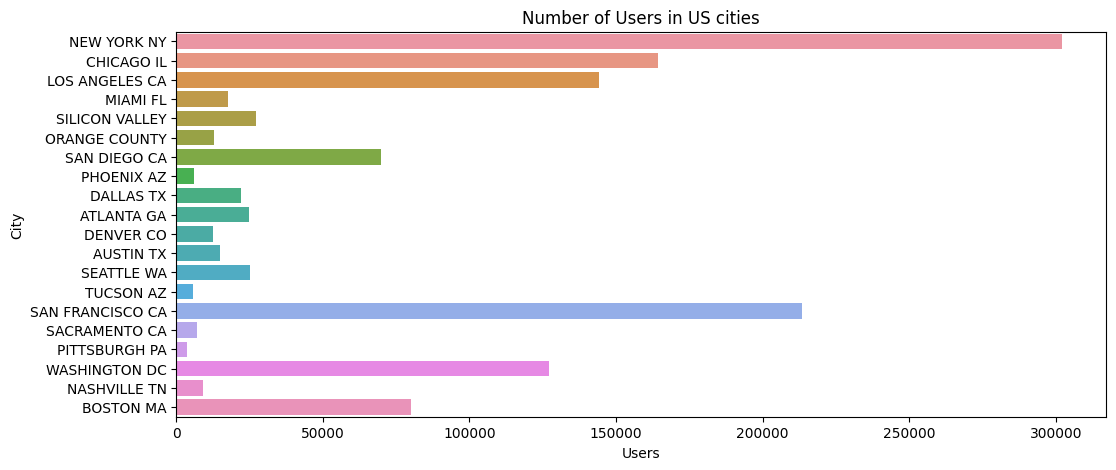

In [26]:
sns.barplot(data=city,y="City",x="Users").set_title('Number of Users in US cities');

CPU times: user 443 ms, sys: 20.4 ms, total: 463 ms
Wall time: 471 ms


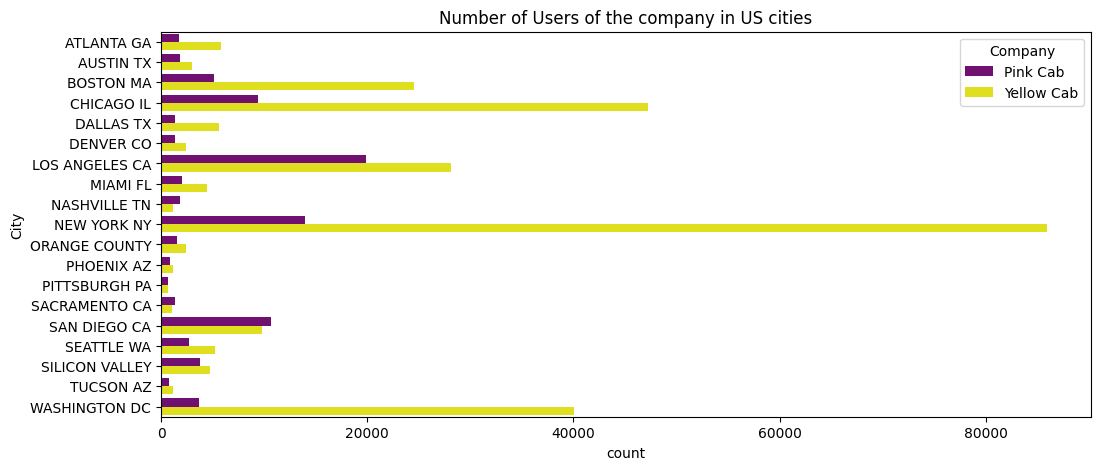

In [55]:
%%time
sns.countplot(data=masterdata,y="City",hue="Company", palette=["purple","yellow"]).set_title('Number of Users of the company in US cities');

# Conclusion -5
From above graph, it can iterate that Yellow cab has captured the top cities like New york, Chicago, Washington where there are higher number of users. Pink cab has dominance in some cities like San Diego, Sacramento but it is not that significant. 

In [33]:
masterdata["Profit Year"]= masterdata['Date of Travel'].dt.year

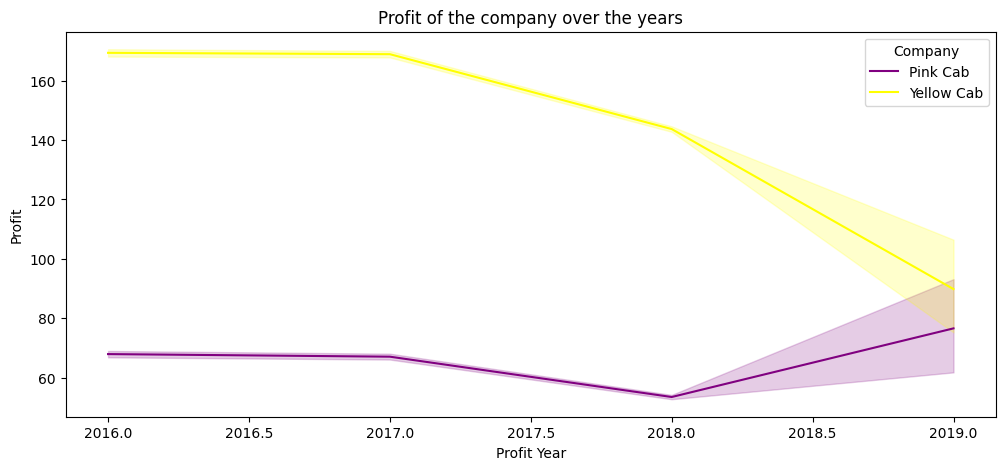

In [57]:
sns.lineplot(data=masterdata,x='Profit Year',y="Profit",hue="Company",palette=["purple","yellow"]).set_title('Profit of the company over the years');

# Conclusion 6
We can argue that Pink Cab profit has incresed over the years and gasp the market firmly. While, Yellow cab profit has been hampered over the years and declining significantly.

In [32]:
masterdata.to_csv("Merged_Data.csv")